In [1]:
# Phase 1: Data Understanding & Cleaning

# ==========================
# 1. Import libraries
# ==========================
import pandas as pd
import numpy as np

# ==========================
# 2. Load dataset
# ==========================
df = pd.read_csv("fitness_and_workout_dataset.csv")

# Preview first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Shape of the dataset
print(f"\nDataset Shape: {df.shape}")

# Data types and non-null counts
print("\nDataset Info:")
print(df.info())

# Summary statistics for numeric columns
print("\nSummary Statistics (Numerical):")
print(df.describe())

# ==========================
# 3. Check for missing values
# ==========================
print("\nMissing Values Per Column:")
print(df.isnull().sum())

# ==========================
# 4. Standardize categorical features
# ==========================
# Example: Convert text to lowercase and strip spaces
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# ==========================
# 5. Handle missing values
# ==========================
# Option 1: Fill missing numerical values with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Option 2: Fill missing categorical values with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# ==========================
# 6. Feature Engineering
# ==========================
# Example: Total workout hours = program_length (weeks) × time_per_workout (minutes) × 7 / 60
if "program_length" in df.columns and "time_per_workout" in df.columns:
    df["total_workout_hours"] = (df["program_length"] * df["time_per_workout"] * 7) / 60

# ==========================
# 7. Save cleaned dataset
# ==========================
df.to_csv("fitness_and_workout_dataset_cleaned.csv", index=False)
print("\n✅ Data cleaning completed. Saved as 'fitness_and_workout_dataset_cleaned.csv'")


First 5 rows of the dataset:
                                               title  \
0  (MASS MONSTER) High Intensity 4 Day Upper Lowe...   
1                         (NOT MY PROGRAM)SHJ Jotaro   
2  1 PowerLift Per Day Powerbuilding 5 Day Bro Split   
3                      10 Week Mass Building Program   
4                             10 week deadlift focus   

                                         description  \
0  Build tones of muscular with this high intensi...   
1                            Build strength and size   
2  Based off of Andy Baker's KCS (Kingwood Streng...   
3  This workout is designed to increase your musc...   
4                                  Increase deadlift   

                                    level  \
0                        ['Intermediate']   
1            ['Advanced', 'Intermediate']   
2  ['Beginner', 'Novice', 'Intermediate']   
3            ['Intermediate', 'Advanced']   
4            ['Intermediate', 'Advanced']   

                          


Dataset Shape: (2598, 11)

Column Names: ['title', 'description', 'level', 'goal', 'equipment', 'program_length', 'time_per_workout', 'total_exercises', 'created', 'last_edit', 'total_workout_hours']

First 5 Rows:
                                               title  \
0  (mass monster) high intensity 4 day upper lowe...   
1                         (not my program)shj jotaro   
2  1 powerlift per day powerbuilding 5 day bro split   
3                      10 week mass building program   
4                             10 week deadlift focus   

                                         description  \
0  build tones of muscular with this high intensi...   
1                            build strength and size   
2  based off of andy baker's kcs (kingwood streng...   
3  this workout is designed to increase your musc...   
4                                  increase deadlift   

                                    level  \
0                        ['intermediate']   
1            ['advan

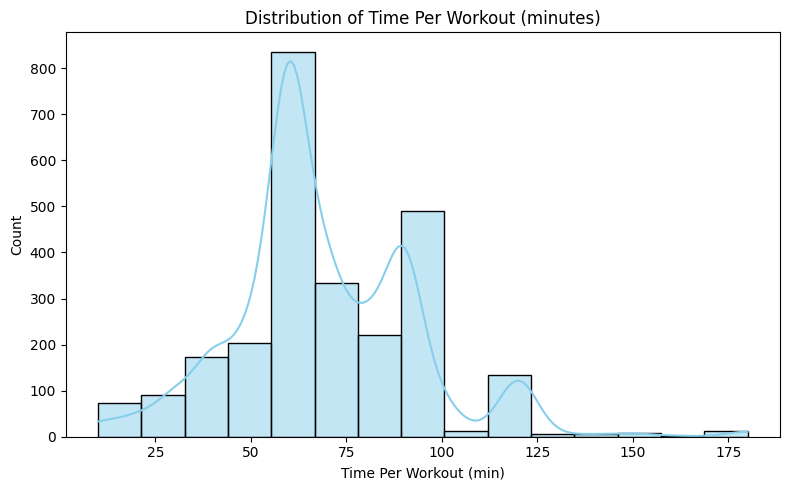

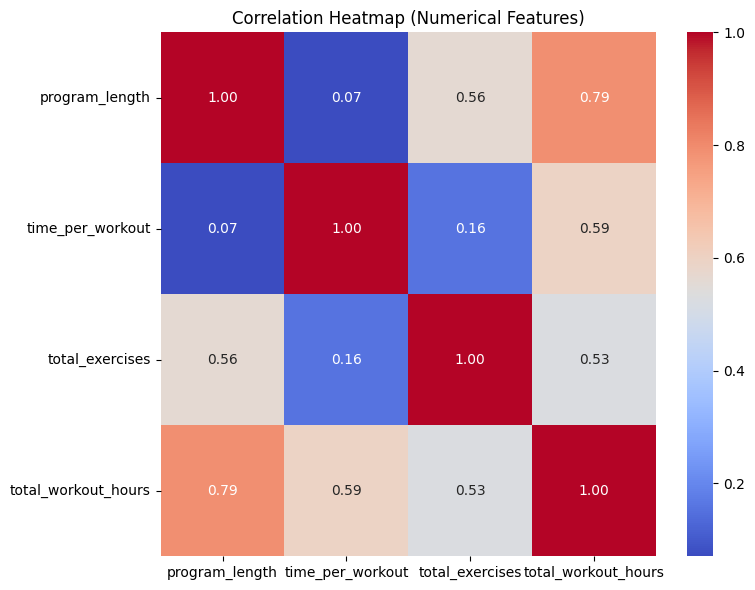

In [2]:
# Phase 2: Exploratory Data Analysis (EDA)

# ==========================
# 1. Import libraries
# ==========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("fitness_and_workout_dataset_cleaned.csv")

# ==========================
# 2. Basic Overview
# ==========================
print("\nDataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 Rows:")
print(df.head())

# ==========================
# 3. Goal Distribution
# ==========================
if "goal_type" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x="goal_type", order=df["goal_type"].value_counts().index, palette="coolwarm")
    plt.title("Distribution of Fitness Goals")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ==========================
# 4. Workout Duration Trends
# ==========================
if "time_per_workout" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df["time_per_workout"], bins=15, kde=True, color="skyblue")
    plt.title("Distribution of Time Per Workout (minutes)")
    plt.xlabel("Time Per Workout (min)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ==========================
# 5. Equipment Usage by Goal Type
# ==========================
if "equipment_used" in df.columns and "goal_type" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x="equipment_used", hue="goal_type", order=df["equipment_used"].value_counts().index)
    plt.title("Equipment Usage by Goal Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ==========================
# 6. Correlation Heatmap
# ==========================
numeric_cols = df.select_dtypes(include=["number"]).columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()

# ==========================
# 7. Fitness Level vs Time Per Workout
# ==========================
if "fitness_level" in df.columns and "time_per_workout" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="fitness_level", y="time_per_workout", palette="Set2")
    plt.title("Time Per Workout by Fitness Level")
    plt.tight_layout()
    plt.show()
